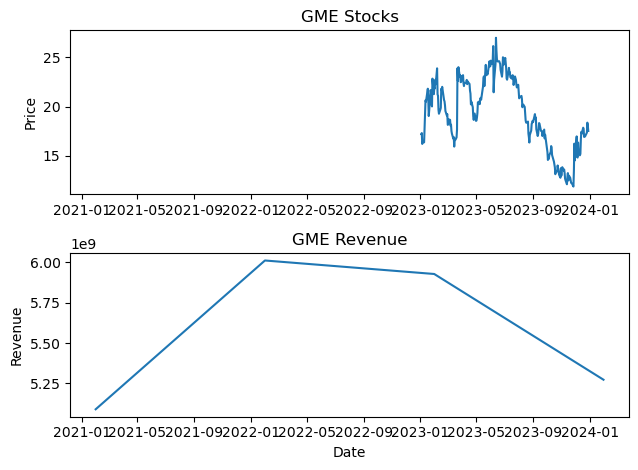

In [13]:
%pip install yfinance
class AutoImport:
    import importlib
    def __getattr__(auto, name):
        return auto.importlib.import_module(name)

    @property
    def pd(auto):
        import pandas
        return pandas

    @property
    def plt(auto):
        import matplotlib.pyplot
        return matplotlib.pyplot

auto = AutoImport()

def Stocks(
    name: str,
    *,
    start: str,
    end: str,
) -> auto.pd.DataFrame:
    global __Stocks_cache
    try: __Stocks_cache
    except NameError: __Stocks_cache = {}
    cache = __Stocks_cache

    ckey = (name, start, end)
    if ckey not in cache:
        ticker = auto.yfinance.Ticker(name)

        df = ticker.history(start=start, end=end)

        cache[ckey] = df
    else:
        df = cache[ckey]

    return df
    
def Financials(
    name: str,
) -> auto.pd.DataFrame:
    global __Financials_cache
    try: __Financials_cache
    except NameError: __Financials_cache = {}
    cache = __Financials_cache

    ckey = name
    if ckey not in cache:
        ticker = auto.yfinance.Ticker(name)

        df = ticker.financials.T
        df.index.name = 'Date'

        cache[ckey] = df
    else:
        df = cache[ckey]

    return df
    
def make_graph():
    stocks = Stocks('GME', start='2023-01-01', end='2024-01-01')
    financials = Financials('GME')

    fig = auto.plt.figure()

    ax = fig.add_subplot(211)
    ax.plot(stocks.index, stocks['Close'])
    ax.set_ylabel('Price')
    ax.set_title('GME Stocks')

    ax = fig.add_subplot(212, sharex=ax)
    ax.plot(financials.index, financials['Total Revenue'])
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Date')
    ax.set_title('GME Revenue')

    fig.tight_layout()
    display(fig)
    auto.plt.close(fig)

make_graph()